## Step 1 : Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 : Import Data

In [2]:
df=pd.read_csv("/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv")

## Step 3 : Data Overview

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S
3760,2020,SE,FT,Data Scientist,412000,USD,412000,US,L


In [5]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
1985,2022,MI,FT,Data Engineer,70000,USD,70000,US,M
1058,2023,SE,FT,Data Science Manager,299500,USD,299500,US,M
478,2023,MI,FT,Machine Learning Engineer,219000,USD,219000,US,L
615,2023,SE,FT,Machine Learning Engineer,212200,USD,212200,US,M
2150,2022,MI,FT,Data Engineer,65000,GBP,80036,GB,M
3097,2022,SE,FT,Data Scientist,191475,USD,191475,US,M
2087,2022,MI,FT,Data Analyst,100000,USD,100000,US,M
549,2023,SE,FT,Data Engineer,238000,USD,238000,US,M
502,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,L
3472,2021,EN,FT,BI Data Analyst,55000,USD,55000,US,S


## Step 4 : Basic Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [7]:
df.shape

(3761, 9)

In [8]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


#### Check missing values

In [9]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

#### Check duplicated

In [10]:
df.duplicated().sum()

1351

In [11]:
df=df.drop_duplicates()
df.duplicated().sum()

0

## Conclusion

In conclusion, our basic data exploration revealed the following key findings:

1.**Data Types:** The data types of our dataset are accurate and appropriate for our analysis, indicating that the data is well-structured.

2.**Missing Values:** We found no missing values in our dataset. This suggests that our data is complete and ready for analysis without the need for imputation.

3.**Duplicate Entries:** Initially, there were 1351 duplicate entries in the dataset. However, we have successfully removed these duplicate rows, ensuring data integrity for our analysis.

**These observations assure us that our dataset is in good shape and suitable for further analysis and insights.**

##### Checking Unique Values in Selected Columns
In this step, we will examine the unique values in certain columns, such as:

1. **Experience Level**
2. **Employment Type**
3. **Company Size**

The purpose of this step is to identify values that may need to be replaced with more appropriate and standardized terms.

In [12]:
unique_experience_levels = df['experience_level'].unique()
unique_employment_types = df['employment_type'].unique()
unique_company_sizes = df['company_size'].unique()

print("Unique Experience Levels:" , unique_experience_levels)
print("Unique Employment Types:" , unique_employment_types)
print("Unique Company Sizes:" , unique_company_sizes)

Unique Experience Levels: ['EN' 'EX' 'MI' 'SE']
Unique Employment Types: ['FT' 'PT' 'CT' 'FL']
Unique Company Sizes: ['L' 'M' 'S']


In [13]:
df.loc[:, 'experience_level'] = df['experience_level'].replace({'EN': 'Entry Level', 'EX': 'Experienced', 'MI': 'Mid-Level', 'SE': 'Senior'})
df.loc[:, 'employment_type'] = df['employment_type'].replace({'FT': 'Full time', 'PT': 'Part time', 'CT': 'Contractor', 'FL': 'Freelancer'})
df.loc[:, 'company_size'] = df['company_size'].replace({'L': 'Large', 'M': 'Medium', 'S': 'Small'})


### Step 5: Exploratory Data Analysis

<Axes: xlabel='experience_level'>

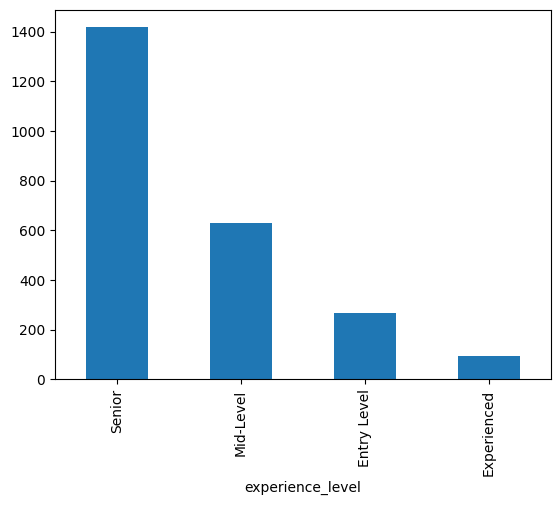

In [14]:
df["experience_level"].value_counts().plot(kind="bar")

<Axes: xlabel='employment_type'>

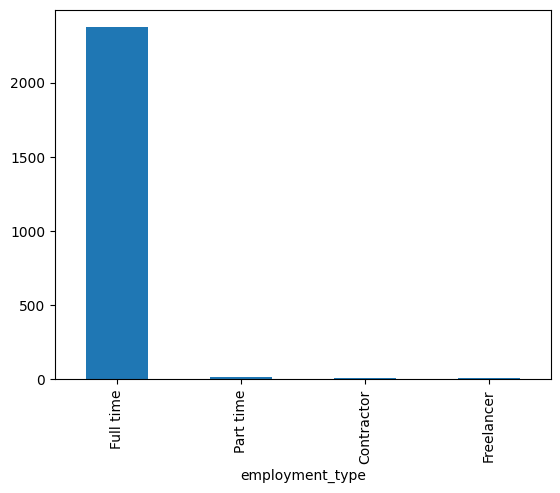

In [15]:
df["employment_type"].value_counts().plot(kind="bar")

<Axes: xlabel='company_size'>

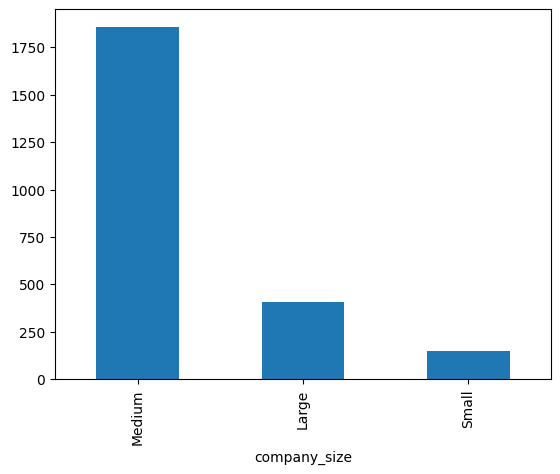

In [16]:
df["company_size"].value_counts().plot(kind="bar")

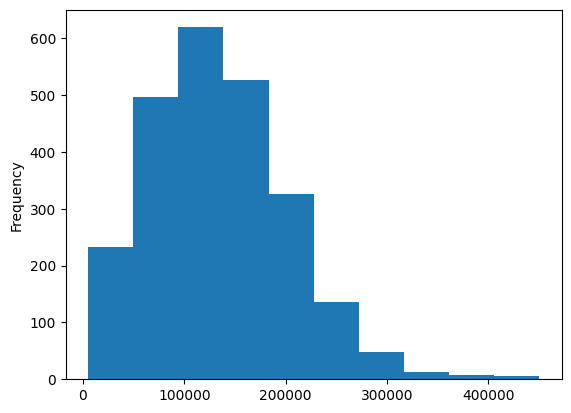

In [17]:
df["salary_in_usd"].plot(kind='hist')
plt.show()

In [18]:
average_salary = df.groupby(["experience_level", "employment_type"])["salary_in_usd"].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary

,experience_level,employment_type,salary_in_usd
4,Experienced,Contractor,416000.000000
5,Experienced,Full time,188590.510638
12,Senior,Full time,154738.293909
8,Mid-Level,Full time,101988.559871
10,Senior,Contractor,97500.000000
6,Mid-Level,Contractor,78600.000000
1,Entry Level,Freelancer,75000.000000
2,Entry Level,Full time,74479.060241
0,Entry Level,Contractor,65234.500000
11,Senior,Freelancer,53333.333333


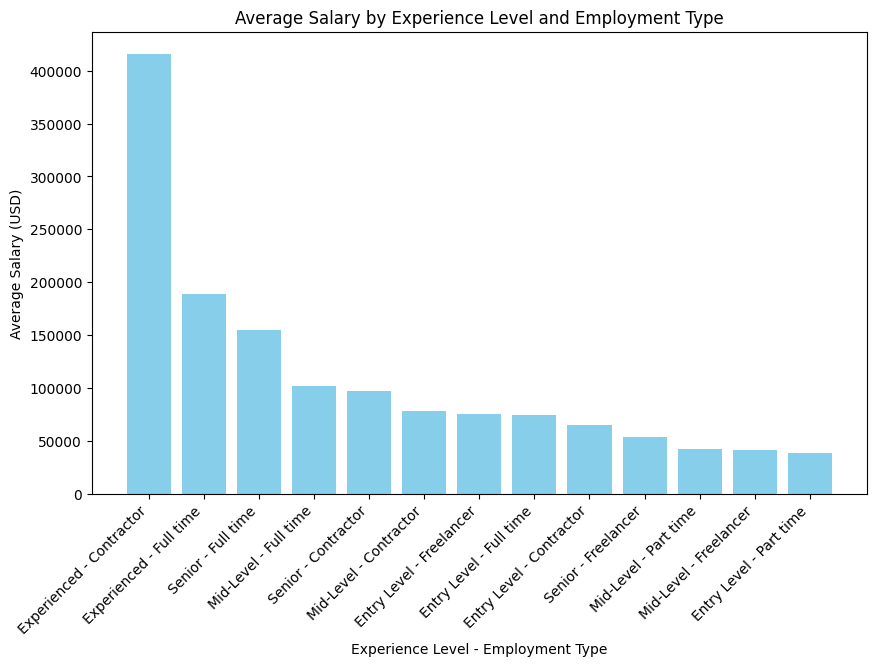

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_salary)), average_salary['salary_in_usd'], color='skyblue')
plt.xticks(range(len(average_salary)), average_salary['experience_level'] + " - " + average_salary['employment_type'], rotation=45, ha="right")
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level - Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

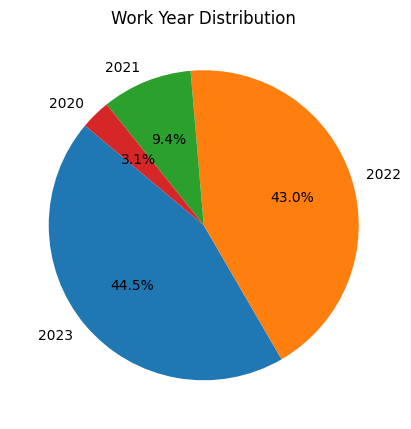

In [20]:
work_year_counts = df['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()

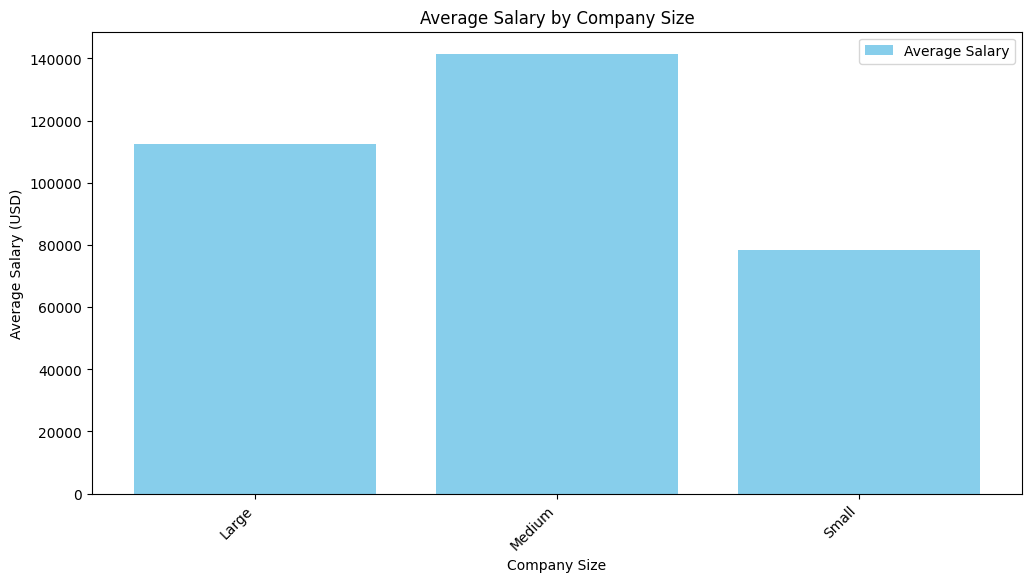

In [21]:
avg_salary_by_size = df.groupby("company_size")["salary_in_usd"].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_size.index, avg_salary_by_size['salary_in_usd'], color='skyblue', label='Average Salary')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.xticks(avg_salary_by_size.index, avg_salary_by_size['company_size'], rotation=45, ha="right")
plt.legend()
plt.show()

In [22]:
%%HTML
<div class='tableauPlaceholder' id='viz1709479558704' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataScienceSalaryAnalysis_17094778165060&#47;Dashboard3&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='path' value='views&#47;DataScienceSalaryAnalysis_17094778165060&#47;Dashboard3?:language=en-GB&amp;:embed=true&amp;:sid=' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataScienceSalaryAnalysis_17094778165060&#47;Dashboard3&#47;1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-GB' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1709479558704');
    var vizElement = divElement.getElementsByTagName('object')[0];
    if (divElement.offsetWidth > 800) {
        vizElement.style.width = '1200px';
        vizElement.style.minHeight = '587px';
        vizElement.style.maxHeight = '887px';
        vizElement.style.height = (divElement.offsetWidth * 0.75) + 'px';
    } else if (divElement.offsetWidth > 500) {
        vizElement.style.width = '1200px';
        vizElement.style.minHeight = '587px';
        vizElement.style.maxHeight = '887px';
        vizElement.style.height = (divElement.offsetWidth * 0.75) + 'px';
    } else {
        vizElement.style.width = '100%';
        vizElement.style.height = '977px';
    }
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>
